<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

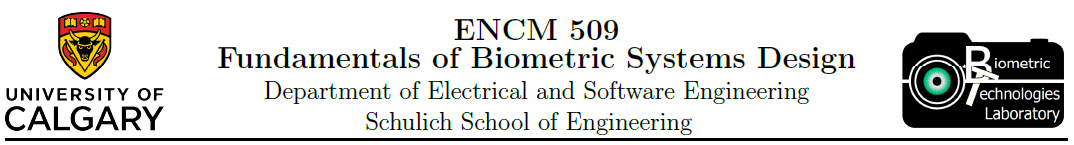

## Lab 2:

* Team member Abid Al Labib 
    - UCID: 30070079
* Team member - UCID: 
    - UCID: 
    
    

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### Exercise 1:

In [9]:
# Theorectical Mean and Std
mu = 50
std = 5
qtt_samples = 1000

pop_norm = norm.rvs(mu, std, size=qtt_samples)
pop_norm 

array([51.7061577 , 47.48932701, 48.22611929, 56.99310493, 39.21469386,
       46.54037246, 50.32631488, 45.47522768, 49.36113348, 52.24011009,
       53.01906681, 59.34137884, 40.76203006, 45.23747893, 46.91147585,
       55.70074412, 48.22905685, 45.42690421, 48.09661141, 45.41758124,
       47.95477625, 53.52022593, 51.99428965, 47.41558127, 51.52195537,
       45.79181472, 55.00903003, 55.6998121 , 45.89227276, 45.00349307,
       61.88053917, 53.00189412, 48.10846795, 42.47442655, 52.55333527,
       44.80076614, 49.83628036, 45.39503874, 54.10671617, 59.70645617,
       45.84309856, 55.72472791, 49.28696184, 50.92471148, 51.3215517 ,
       46.0268204 , 40.63678645, 43.90307287, 55.18075629, 54.19459117,
       51.25776202, 56.86727168, 53.55467983, 38.77191022, 51.94984722,
       43.64243482, 51.0493964 , 57.93102354, 52.71579607, 45.69365279,
       51.92341788, 47.65733105, 47.23369564, 38.92098144, 53.171697  ,
       52.46409798, 48.42517171, 43.90878727, 46.14396742, 52.59

REAL mean: 49.88; std: 5.05


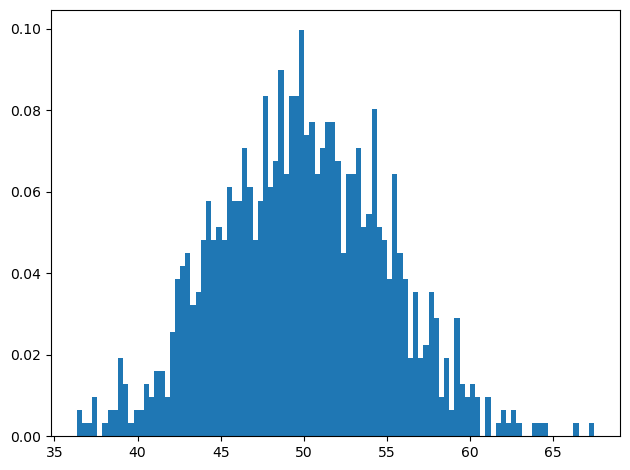

In [10]:
plt.hist(pop_norm, bins= 100, density=True);
print('REAL mean: %.2f; std: %.2f' % (np.mean(pop_norm), np.std(pop_norm)))

### Exercise 2:

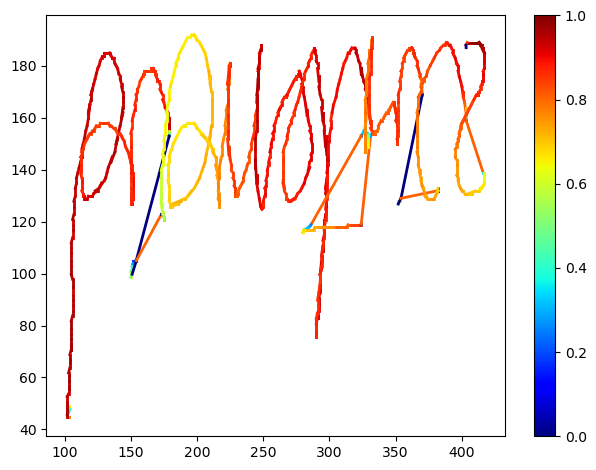

In [11]:
# data folder:
# 'signature_samples/biometrics/'
# 'signature_samples/calgary/'
# 'signature_samples/hello/'

# 'genuine' or 'impostor'
subdir = 'impostor/'
data_dir = 'biometrics/' + subdir

csv_file = pd.read_csv(data_dir + '2.csv')

csv_file.head()
# splitting the original data/ matrix into 3 variables
coord1 = csv_file[[ 'X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))
prs1_arr = prs1
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)
pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    im = plt.plot( coord1[i:i+2 ,0] , coord1[i:i+2 ,1], linewidth =2, c=c)
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin =0, vmax =1))
plt. colorbar(sm)

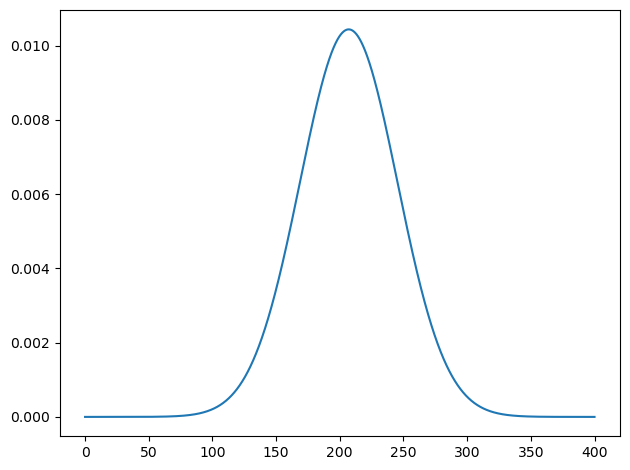

In [12]:
mean = np.mean(prs1)
std = np.std(prs1)

arr = np.arange(0,400,0.01)


plt.plot(arr, norm.pdf(arr,mean,std))
plt.show()

### Exercise 3:

To avoid division by zero

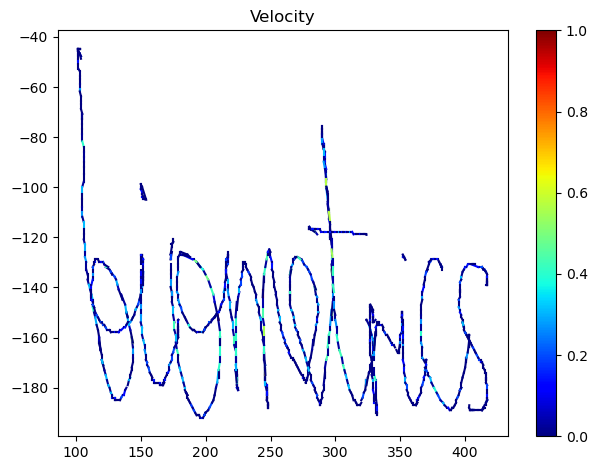

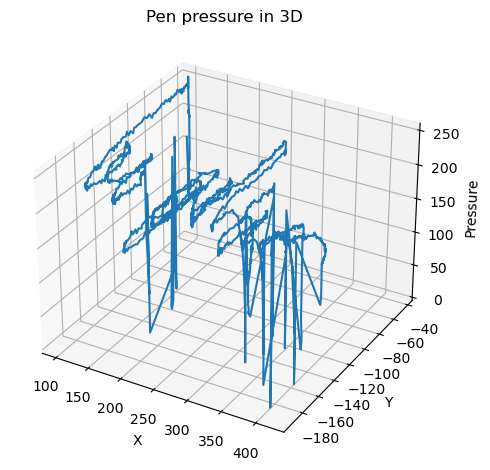

In [13]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1,0] - coord1[i,0])**2 + 
                       (coord1[i+1,1] - coord1[i,1])**2)

    # if too fast, time_diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1

vel = np.insert(vel, 0, 1)
vel = vel / np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)

for i in range(len(vel)-1):
    c = velmap(vel[i])
    
    time_diff = abs(time1[i+1] - time1[i])
        
    if time_diff < 17: # You may need to change this threshould
        plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)
plt.title('Velocity')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);
plt.show()
def calc_velocity(time, coords):
    vel = np.zeros((len(time)-1, 1))

    for i in range(len(time)-1):
        distance = np.sqrt((coords[i+1,0] - coords[i,0])**2 +
                           (coords[i+1,1] - coords[i,1])**2)
        
        # if too fast time_diff = 0
        time_diff = time[i+1] - time[i]
        if time_diff == 0:
            time_diff = 0.0001

        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1

    vel = np.insert(vel, 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel.astype(int)
    
    return vel

ax = plt.axes(projection='3d')

ax.plot3D(coord1[:,0].flatten(), -coord1[:,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title('Pen pressure in 3D');

### Exercise 4:

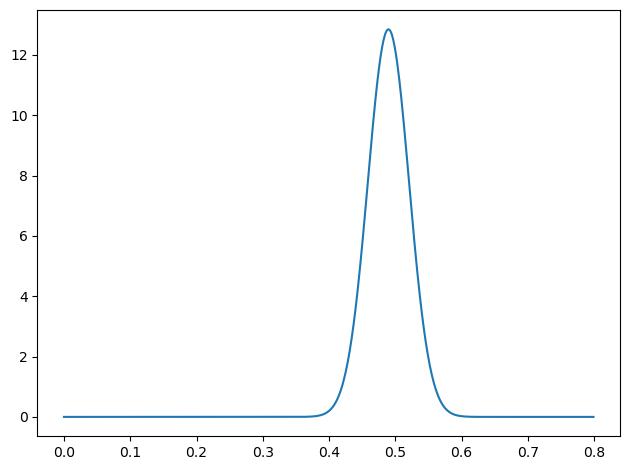

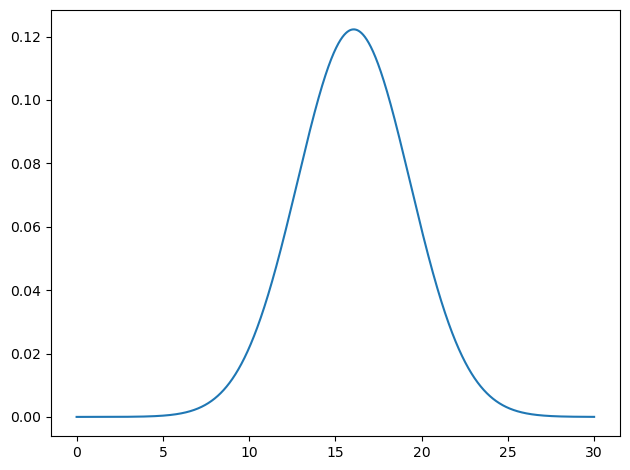

In [15]:
#loading our signatures

data_dir = 'sig_vals/'

coord_arr = []
time_arr = []
prs_arr = []
vel_arr = []
for i in range(1,31):
    file = f'g{i}.csv'
    csv_file = pd.read_csv(data_dir + file)
    
    coord1 = csv_file[[ 'X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))
    prs1_arr = prs1
    
    prs_arr.append(np.mean(prs1))
    vel = calc_velocity(time1,coord1)    
    vel_arr.append(np.mean(vel))
    
mean_prs_g = np.mean(prs_arr)
std_prs_g = np.std(prs_arr)

mean_vel_g = np.mean(vel_arr)
std_vel_g = np.std(vel_arr)

prs_range_g = np.arange(0,0.8,0.001)
vel_range_g = np.arange(0,30,0.01)


plt.plot(prs_range_g, norm.pdf(prs_range_g,mean_prs_g,std_prs_g))
plt.show()

plt.plot(vel_range_g, norm.pdf(vel_range_g,mean_vel_g,std_vel_g))
plt.show()

### Exercise 5:

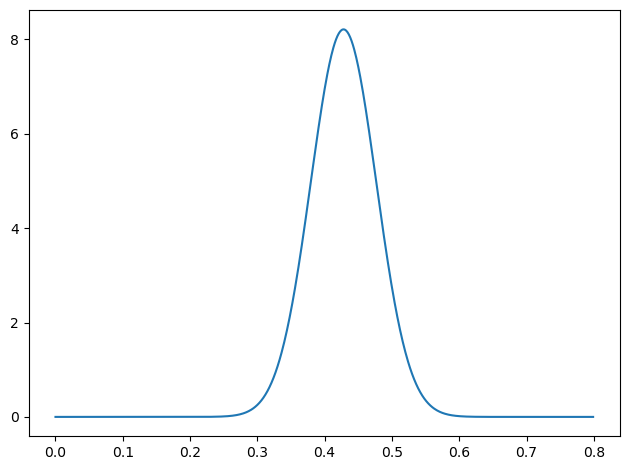

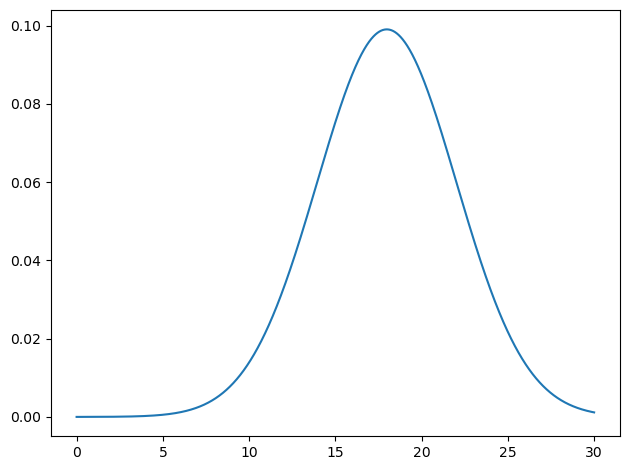

In [18]:
#loading our signatures

data_dir = 'sig_vals/'

coord_arr = []
time_arr = []
prs_arr = []
vel_arr = []
for i in range(1,31):
    file = f'i{i}.csv'
    csv_file = pd.read_csv(data_dir + file)
    
    coord1 = csv_file[[ 'X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))
    prs1_arr = prs1
    
    prs_arr.append(np.mean(prs1))
    vel = calc_velocity(time1,coord1)    
    vel_arr.append(np.mean(vel))
    
mean_prs_i = np.mean(prs_arr)
std_prs_i = np.std(prs_arr)

mean_vel_i = np.mean(vel_arr)
std_vel_i = np.std(vel_arr)

prs_range_i = np.arange(0,0.8,0.001)
vel_range_i = np.arange(0,30,0.01)


plt.plot(prs_range_i, norm.pdf(prs_range_i,mean_prs_i,std_prs_i))
plt.show()

plt.plot(vel_range_i, norm.pdf(vel_range_i,mean_vel_i,std_vel_i))
plt.show()

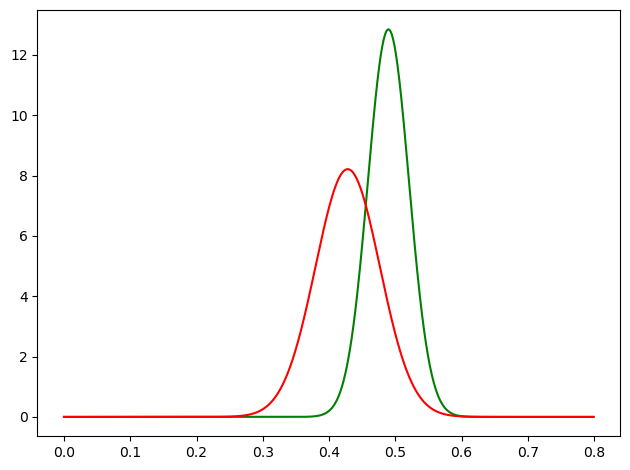

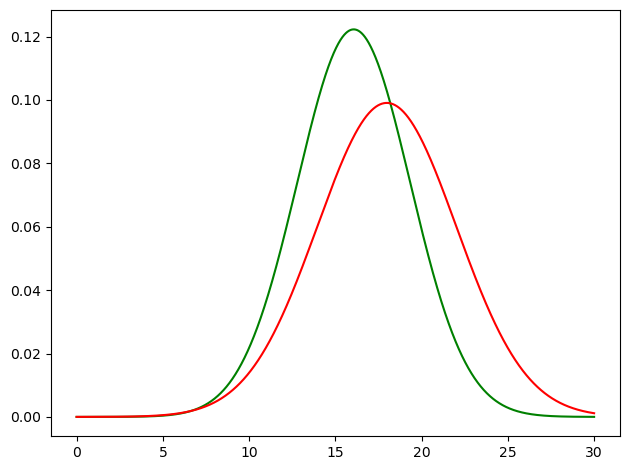

In [19]:
plt.plot(prs_range_g, norm.pdf(prs_range_g,mean_prs_g,std_prs_g),'g')
plt.plot(prs_range_i, norm.pdf(prs_range_i,mean_prs_i,std_prs_i),'r')
plt.show()

plt.plot(vel_range_g, norm.pdf(vel_range_g,mean_vel_g,std_vel_g),'g')
plt.plot(vel_range_i, norm.pdf(vel_range_i,mean_vel_i,std_vel_i),'r')
plt.show()


**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

**Specific Questions** (See the handout PDF for details)

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
    - Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
    - Plot the histogram with 100 bins.
    - Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided.

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?